<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


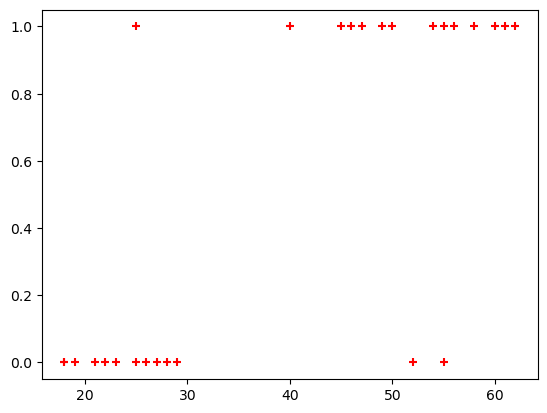

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8,random_state=42)

In [6]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


In [10]:
y_predicted = model.predict(X_test)

In [11]:
model.predict_proba(X_test)

array([[0.05428672, 0.94571328],
       [0.7055532 , 0.2944468 ],
       [0.06039333, 0.93960667],
       [0.77084966, 0.22915034],
       [0.84096469, 0.15903531],
       [0.72848723, 0.27151277]])

In [12]:
model.score(X_test,y_test)

1.0

In [13]:
y_predicted

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


**model.coef_ indicates value of m in y=m*x + b equation**

In [15]:
model.coef_

array([[0.11307708]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [16]:
model.intercept_

array([-4.15311919])

**Lets defined sigmoid function now and do the math with hand**

In [17]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age):
    z = 0.11307718 * age -4.15312723 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [19]:
age = 35
prediction_function(age)

0.4512984169701505

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [20]:
age = 53
prediction_function(age)

0.8629443681051853

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

C:\Users\Bhuvaneswaran\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


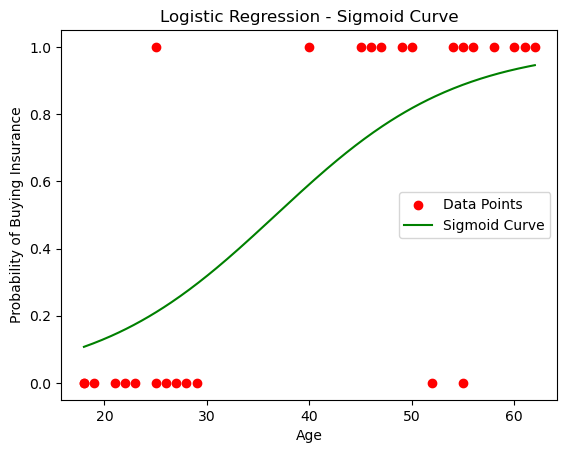

In [21]:
import numpy as np
# Generate a range of age values for plotting the sigmoid curve
age_range = np.linspace(df.age.min(), df.age.max(), 300).reshape(-1, 1)

# Predict probabilities for the age range
y_prob = model.predict_proba(age_range)[:, 1]

# Plotting the original data points
plt.scatter(df.age, df.bought_insurance, color='red', label='Data Points')

# Plotting the sigmoid curve
plt.plot(age_range, y_prob, color='green', label='Sigmoid Curve')

plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.title("Logistic Regression - Sigmoid Curve")
plt.legend()
plt.show()